In [1]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm
import preliz as pz

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
np.random.seed(123)

In [3]:
trials = 4
theta_real = 0.35
data = pz.Binomial(n=1, p=theta_real).rvs(trials)

In [4]:
with pm.Model() as our_first_model:
    θ = pm.Beta('θ', alpha=1., beta=1.)
    y = pm.Bernoulli('y', p=θ, observed=data)
    idata = pm.sample(1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [θ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 0 seconds.


array([[<Axes: title={'center': 'θ'}>, <Axes: title={'center': 'θ'}>]],
      dtype=object)

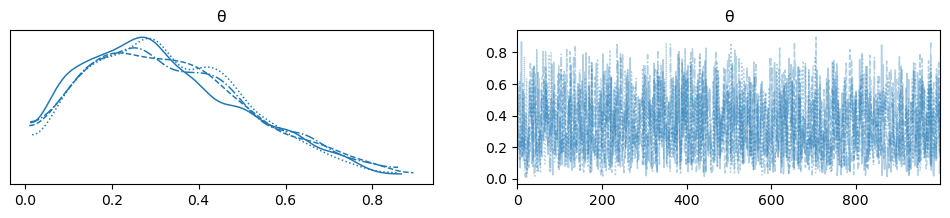

In [5]:
az.plot_trace(idata)

array([[<Axes: title={'center': 'θ'}>,
        <Axes: title={'center': 'θ'}, xlabel='Rank (all chains)', ylabel='Chain'>]],
      dtype=object)

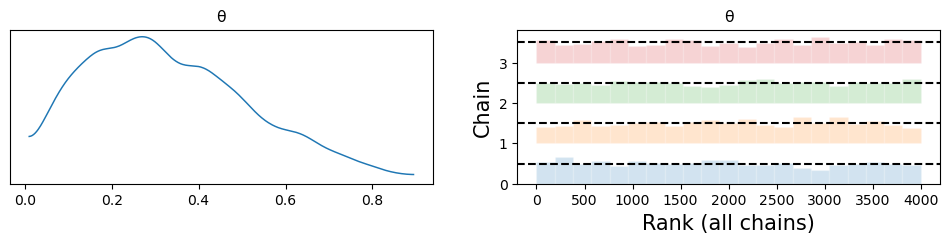

In [6]:
az.plot_trace(idata, kind="rank_bars", combined=True)

In [7]:
az.summary(idata, kind="stats").round(2)

,mean,sd,hdi_3%,hdi_97%
θ,0.33,0.18,0.04,0.66


<Axes: title={'center': 'θ'}>

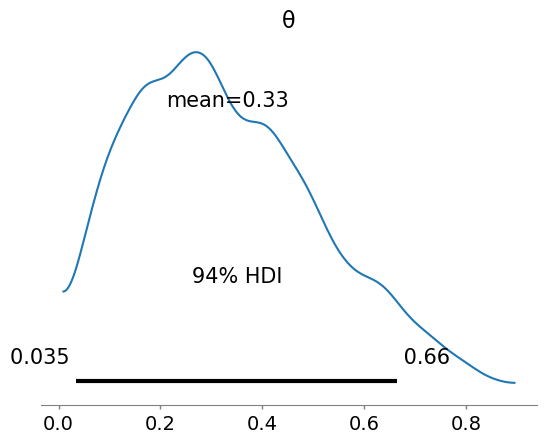

In [8]:
az.plot_posterior(idata)

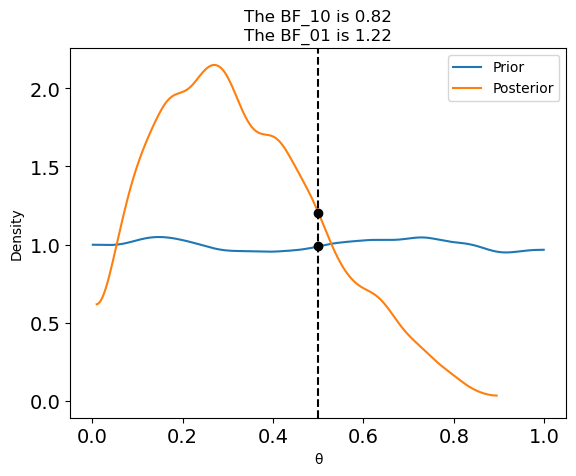

In [9]:
az.plot_bf(idata, var_name="θ", prior=np.random.uniform(0, 1, 10000), ref_val=0.5);

<Axes: title={'center': 'θ'}>

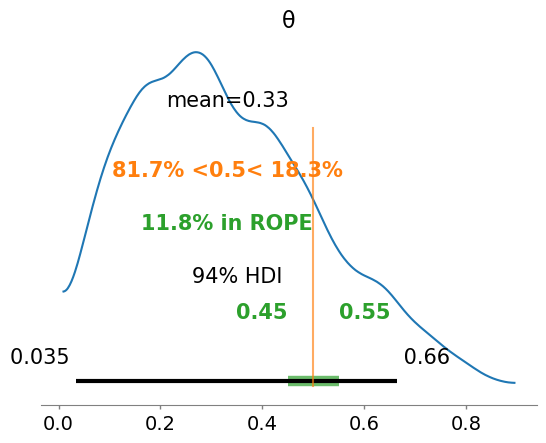

In [10]:
az.plot_posterior(idata, rope=[0.45, 0.55], ref_val=0.5)

In [11]:
data = np.loadtxt("data/chemical_shifts.csv")

In [12]:
with pm.Model() as model_g:
    μ = pm.Uniform('μ', lower=40, upper=70)
    σ = pm.HalfNormal('σ', sigma=5)
    Y = pm.Normal('Y', mu=μ, sigma=σ, observed=data)
    idata_g = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [μ, σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.


array([[<Axes: title={'center': 'μ'}>, <Axes: title={'center': 'μ'}>],
       [<Axes: title={'center': 'σ'}>, <Axes: title={'center': 'σ'}>]],
      dtype=object)

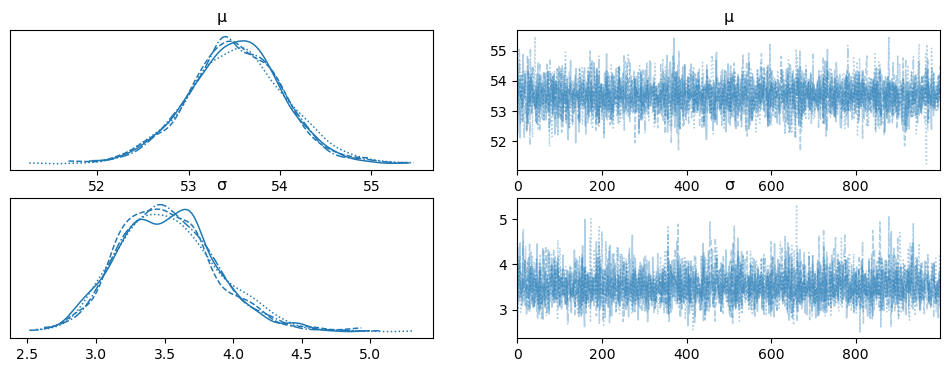

In [13]:
az.plot_trace(idata_g)

array([[<Axes: >, None],
       [<Axes: xlabel='μ', ylabel='σ'>, <Axes: >]], dtype=object)

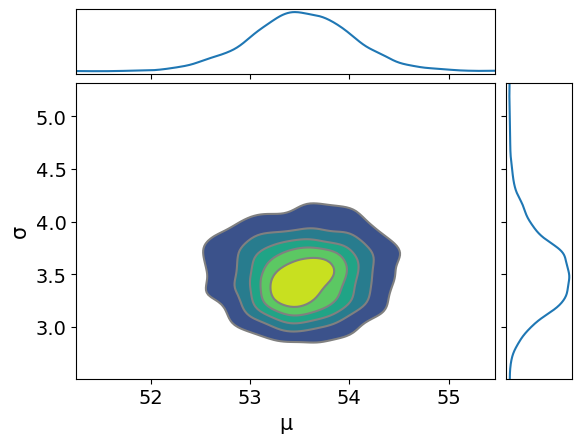

In [14]:
az.plot_pair(idata_g, marginals=True, kind='kde')

In [15]:
az.summary(idata_g, kind="stats").round(2)

,mean,sd,hdi_3%,hdi_97%
μ,53.51,0.52,52.48,54.44
σ,3.52,0.36,2.92,4.24


In [16]:
pm.sample_posterior_predictive(idata_g, model=model_g, extend_inferencedata=True)

Sampling: [Y]


Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

<Axes: xlabel='Y / Y'>

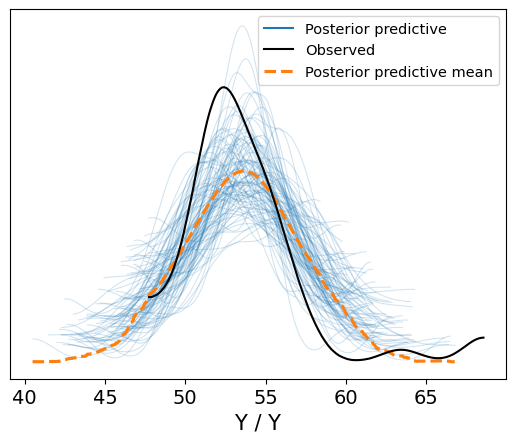

In [17]:
az.plot_ppc(idata_g, num_pp_samples=100)

In [19]:
with pm.Model() as model_t:
    μ = pm.Uniform('μ', lower=40, upper=75)
    σ = pm.HalfNormal('σ', sigma=10)
    ν = pm.Exponential('ν', 1/30)
    y = pm.StudentT('y', nu=ν, mu=μ, sigma=σ, observed=data)
    idata_t = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [μ, σ, ν]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.


array([[<Axes: title={'center': 'μ'}>, <Axes: title={'center': 'μ'}>],
       [<Axes: title={'center': 'σ'}>, <Axes: title={'center': 'σ'}>],
       [<Axes: title={'center': 'ν'}>, <Axes: title={'center': 'ν'}>]],
      dtype=object)

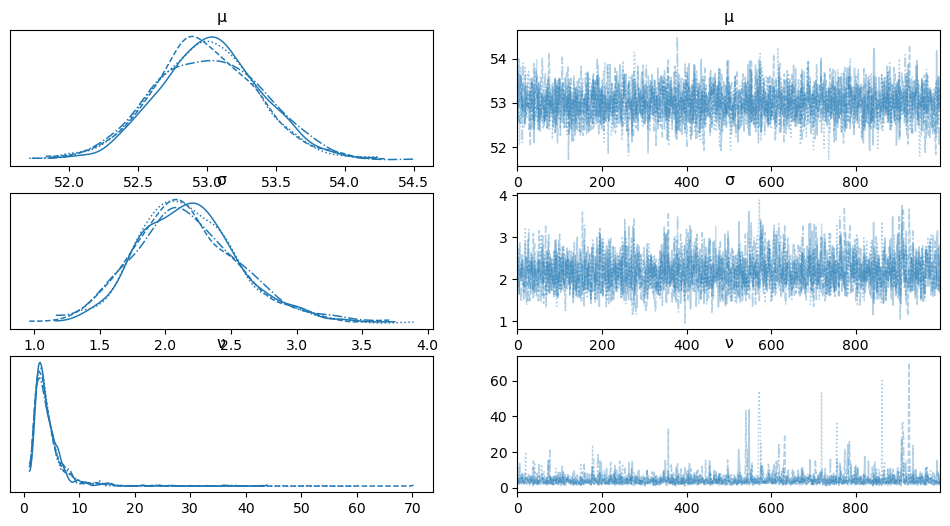

In [20]:
az.plot_trace(idata_t)

In [21]:
az.summary(idata_t, kind="stats").round(2)

,mean,sd,hdi_3%,hdi_97%
μ,53.00,0.38,52.26,53.69
σ,2.17,0.39,1.40,2.88
ν,4.53,3.89,1.12,9.02


In [22]:
az.summary(idata_g, kind="stats").round(2)

,mean,sd,hdi_3%,hdi_97%
μ,53.51,0.52,52.48,54.44
σ,3.52,0.36,2.92,4.24


In [23]:
pm.sample_posterior_predictive(idata_t, model=model_g, extend_inferencedata=True)

Sampling: [y]


Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

(40.0, 70.0)

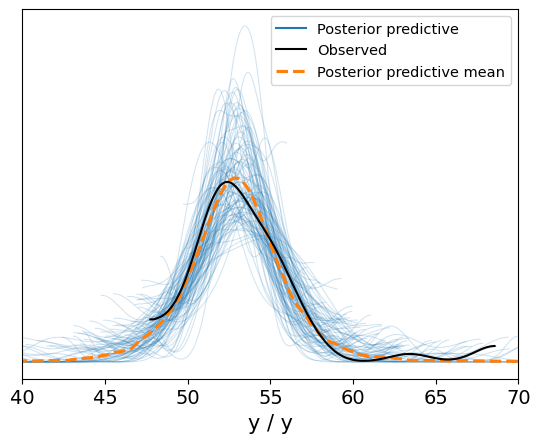

In [24]:
ax = az.plot_ppc(idata_t, num_pp_samples=100)
ax.set_xlim(40, 70)

In [25]:
idata_g

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

In [26]:
posterior = idata_g.posterior
posterior

<xarray.Dataset>
Dimensions:  (chain: 4, draw: 1000)
Coordinates:
  * chain    (chain) int64 0 1 2 3
  * draw     (draw) int64 0 1 2 3 4 5 6 7 8 ... 992 993 994 995 996 997 998 999
Data variables:
    μ        (chain, draw) float64 53.77 52.7 54.46 54.05 ... 53.16 53.83 53.28
    σ        (chain, draw) float64 3.532 3.614 4.377 3.998 ... 3.433 3.261 3.681
Attributes:
    created_at:                 2024-03-04T03:13:45.756677
    arviz_version:              0.16.1
    inference_library:          pymc
    inference_library_version:  5.8.0
    sampling_time:              0.7633850574493408
    tuning_steps:               1000

In [27]:
posterior.sel(draw=0, chain=[0, 2])

<xarray.Dataset>
Dimensions:  (chain: 2)
Coordinates:
  * chain    (chain) int64 0 2
    draw     int64 0
Data variables:
    μ        (chain) float64 53.77 53.55
    σ        (chain) float64 3.532 4.198
Attributes:
    created_at:                 2024-03-04T03:13:45.756677
    arviz_version:              0.16.1
    inference_library:          pymc
    inference_library_version:  5.8.0
    sampling_time:              0.7633850574493408
    tuning_steps:               1000

In [28]:
posterior.sel(draw=slice(0, 100))

<xarray.Dataset>
Dimensions:  (chain: 4, draw: 101)
Coordinates:
  * chain    (chain) int64 0 1 2 3
  * draw     (draw) int64 0 1 2 3 4 5 6 7 8 9 ... 91 92 93 94 95 96 97 98 99 100
Data variables:
    μ        (chain, draw) float64 53.77 52.7 54.46 54.05 ... 53.12 53.7 53.3
    σ        (chain, draw) float64 3.532 3.614 4.377 3.998 ... 3.774 3.08 3.637
Attributes:
    created_at:                 2024-03-04T03:13:45.756677
    arviz_version:              0.16.1
    inference_library:          pymc
    inference_library_version:  5.8.0
    sampling_time:              0.7633850574493408
    tuning_steps:               1000

In [29]:
posterior.mean()

<xarray.Dataset>
Dimensions:  ()
Data variables:
    μ        float64 53.51
    σ        float64 3.522

In [30]:
posterior.mean("draw")

<xarray.Dataset>
Dimensions:  (chain: 4)
Coordinates:
  * chain    (chain) int64 0 1 2 3
Data variables:
    μ        (chain) float64 53.51 53.53 53.49 53.51
    σ        (chain) float64 3.517 3.533 3.516 3.522

In [31]:
stacked = az.extract(idata_g)
stacked

<xarray.Dataset>
Dimensions:  (sample: 4000)
Coordinates:
  * sample   (sample) object MultiIndex
  * chain    (sample) int64 0 0 0 0 0 0 0 0 0 0 0 0 ... 3 3 3 3 3 3 3 3 3 3 3 3
  * draw     (sample) int64 0 1 2 3 4 5 6 7 ... 992 993 994 995 996 997 998 999
Data variables:
    μ        (sample) float64 53.77 52.7 54.46 54.05 ... 53.16 53.16 53.83 53.28
    σ        (sample) float64 3.532 3.614 4.377 3.998 ... 3.433 3.261 3.681
Attributes:
    created_at:                 2024-03-04T03:13:45.756677
    arviz_version:              0.16.1
    inference_library:          pymc
    inference_library_version:  5.8.0
    sampling_time:              0.7633850574493408
    tuning_steps:               1000

In [32]:
az.extract(idata_g, num_samples=100)

<xarray.Dataset>
Dimensions:  (sample: 100)
Coordinates:
  * sample   (sample) object MultiIndex
  * chain    (sample) int64 1 1 0 2 0 3 3 3 0 2 3 1 ... 1 3 3 0 2 3 3 0 3 0 1 2
  * draw     (sample) int64 836 268 910 330 877 847 ... 575 246 533 131 846 734
Data variables:
    μ        (sample) float64 52.95 53.19 53.44 53.82 ... 53.21 52.37 53.62
    σ        (sample) float64 3.104 3.205 3.721 3.724 ... 3.796 3.54 3.336 3.432
Attributes:
    created_at:                 2024-03-04T03:13:45.756677
    arviz_version:              0.16.1
    inference_library:          pymc
    inference_library_version:  5.8.0
    sampling_time:              0.7633850574493408
    tuning_steps:               1000

In [33]:
tips = pd.read_csv("data/tips.csv")
tips.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [34]:
categories = np.array(["Thur", "Fri", "Sat", "Sun"])
tip = tips["tip"].values
idx = pd.Categorical(tips["day"], categories=categories).codes

In [35]:
categories[idx]

array(['Sun', 'Sun', 'Sun', 'Sun', 'Sun', 'Sun', 'Sun', 'Sun', 'Sun',
       'Sun', 'Sun', 'Sun', 'Sun', 'Sun', 'Sun', 'Sun', 'Sun', 'Sun',
       'Sun', 'Sat', 'Sat', 'Sat', 'Sat', 'Sat', 'Sat', 'Sat', 'Sat',
       'Sat', 'Sat', 'Sat', 'Sat', 'Sat', 'Sat', 'Sat', 'Sat', 'Sat',
       'Sat', 'Sat', 'Sat', 'Sat', 'Sat', 'Sun', 'Sun', 'Sun', 'Sun',
       'Sun', 'Sun', 'Sun', 'Sun', 'Sun', 'Sun', 'Sun', 'Sun', 'Sun',
       'Sun', 'Sun', 'Sat', 'Sat', 'Sat', 'Sat', 'Sat', 'Sat', 'Sat',
       'Sat', 'Sat', 'Sat', 'Sat', 'Sat', 'Sat', 'Sat', 'Sat', 'Sat',
       'Sat', 'Sat', 'Sat', 'Sat', 'Sat', 'Thur', 'Thur', 'Thur', 'Thur',
       'Thur', 'Thur', 'Thur', 'Thur', 'Thur', 'Thur', 'Thur', 'Thur',
       'Thur', 'Fri', 'Fri', 'Fri', 'Fri', 'Fri', 'Fri', 'Fri', 'Fri',
       'Fri', 'Fri', 'Fri', 'Fri', 'Sat', 'Sat', 'Sat', 'Sat', 'Sat',
       'Sat', 'Sat', 'Sat', 'Sat', 'Sat', 'Sun', 'Sun', 'Sun', 'Sun',
       'Sun', 'Thur', 'Thur', 'Thur', 'Thur', 'Thur', 'Thur', 'Thur',
       'Thur',

In [36]:
coords = {"days": categories, "days_flat": categories[idx]}

with pm.Model(coords=coords) as comparing_groups:
    μ = pm.HalfNormal("μ", sigma=5, dims="days")
    σ = pm.HalfNormal("σ", sigma=1, dims="days")
    y = pm.Gamma('y', mu=μ[idx], sigma=σ[idx], observed=tip, dims="days_flat")
    idata_cg = pm.sample()
    idata_cg.extend(pm.sample_posterior_predictive(idata_cg))

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [μ, σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.
Sampling: [y]


array([<Axes: xlabel='y / y\nSun'>, <Axes: xlabel='y / y\nSat'>,
       <Axes: xlabel='y / y\nThur'>, <Axes: xlabel='y / y\nFri'>],
      dtype=object)

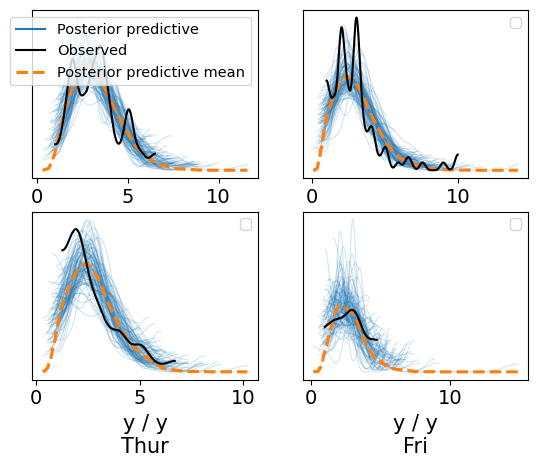

In [37]:
_, axes = plt.subplots(2, 2)
az.plot_ppc(idata_cg, num_pp_samples=100,
           coords={"days_flat": [categories]}, flatten=[], ax=axes)